In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model

In [2]:
d = pd.read_csv('/content/city_day.csv')
d

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,2015-01-01,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN
1,Ahmedabad,2015-01-02,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN
2,Ahmedabad,2015-01-03,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN
3,Ahmedabad,2015-01-04,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN,NaN
4,Ahmedabad,2015-01-05,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29526,Visakhapatnam,2020-06-27,15.02,50.94,7.68,25.06,19.54,12.47,0.47,8.55,23.30,2.24,12.07,0.73,41.0,Good
29527,Visakhapatnam,2020-06-28,24.38,74.09,3.42,26.06,16.53,11.99,0.52,12.72,30.14,0.74,2.21,0.38,70.0,Satisfactory
29528,Visakhapatnam,2020-06-29,22.91,65.73,3.45,29.53,18.33,10.71,0.48,8.42,30.96,0.01,0.01,0.00,68.0,Satisfactory
29529,Visakhapatnam,2020-06-30,16.64,49.97,4.05,29.26,18.80,10.03,0.52,9.84,28.30,0.00,0.00,0.00,54.0,Satisfactory


In [3]:
d.shape

(29531, 16)

In [4]:
d.columns

Index(['City', 'Date', 'PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2',
       'O3', 'Benzene', 'Toluene', 'Xylene', 'AQI', 'AQI_Bucket'],
      dtype='object')

In [5]:
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29531 entries, 0 to 29530
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City        29531 non-null  object 
 1   Date        29531 non-null  object 
 2   PM2.5       24933 non-null  float64
 3   PM10        18391 non-null  float64
 4   NO          25949 non-null  float64
 5   NO2         25946 non-null  float64
 6   NOx         25346 non-null  float64
 7   NH3         19203 non-null  float64
 8   CO          27472 non-null  float64
 9   SO2         25677 non-null  float64
 10  O3          25509 non-null  float64
 11  Benzene     23908 non-null  float64
 12  Toluene     21490 non-null  float64
 13  Xylene      11422 non-null  float64
 14  AQI         24850 non-null  float64
 15  AQI_Bucket  24850 non-null  object 
dtypes: float64(13), object(3)
memory usage: 3.6+ MB


In [6]:
d.isnull()

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,False,False,True,True,False,False,False,True,False,False,False,False,False,False,True,True
1,False,False,True,True,False,False,False,True,False,False,False,False,False,False,True,True
2,False,False,True,True,False,False,False,True,False,False,False,False,False,False,True,True
3,False,False,True,True,False,False,False,True,False,False,False,False,False,False,True,True
4,False,False,True,True,False,False,False,True,False,False,False,False,False,False,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29526,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
29527,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
29528,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
29529,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [7]:
d.isnull().sum()

,0
City,0
Date,0
PM2.5,4598
PM10,11140
NO,3582
NO2,3585
NOx,4185
NH3,10328
CO,2059
SO2,3854


In [8]:
pmean=d["PM2.5"].mean()
d["PM2.5"].fillna(pmean,inplace=True)

In [9]:
pmmean=d["PM10"].mean()
d["PM10"].fillna(pmmean,inplace=True)

In [10]:
nmean=d["NO"].mean()
d["NO"].fillna(nmean,inplace=True)

In [11]:
nomean=d["NO2"].mean()
d["NO2"].fillna(nomean,inplace=True)

In [12]:
noxmean=d["NOx"].mean()
d["NOx"].fillna(noxmean,inplace=True)

In [13]:
nhmean=d["NH3"].mean()
d["NH3"].fillna(nhmean,inplace=True)

In [14]:
cmean=d["CO"].mean()
d["CO"].fillna(cmean,inplace=True)

In [15]:
smean=d["SO2"].mean()
d["SO2"].fillna(smean,inplace=True)

In [16]:
omean=d["O3"].mean()
d["O3"].fillna(omean,inplace=True)

In [17]:
bmean=d["Benzene"].mean()
d["Benzene"].fillna(bmean,inplace=True)

In [18]:
tmean=d["Toluene"].mean()
d["Toluene"].fillna(tmean,inplace=True)

In [19]:
xmean=d["Xylene"].mean()
d["Xylene"].fillna(xmean,inplace=True)

In [20]:
amean=d["AQI"].mean()
d["AQI"].fillna(amean,inplace=True)

In [21]:
d.isnull().sum()

,0
City,0
Date,0
PM2.5,0
PM10,0
NO,0
NO2,0
NOx,0
NH3,0
CO,0
SO2,0


In [22]:
d

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,2015-01-01,67.450578,118.127103,0.92,18.22,17.15,23.483476,0.92,27.64,133.36,0.00000,0.020000,0.000000,166.463581,NaN
1,Ahmedabad,2015-01-02,67.450578,118.127103,0.97,15.69,16.46,23.483476,0.97,24.55,34.06,3.68000,5.500000,3.770000,166.463581,NaN
2,Ahmedabad,2015-01-03,67.450578,118.127103,17.40,19.30,29.70,23.483476,17.40,29.07,30.70,6.80000,16.400000,2.250000,166.463581,NaN
3,Ahmedabad,2015-01-04,67.450578,118.127103,1.70,18.48,17.97,23.483476,1.70,18.59,36.08,4.43000,10.140000,1.000000,166.463581,NaN
4,Ahmedabad,2015-01-05,67.450578,118.127103,22.10,21.42,37.76,23.483476,22.10,39.33,39.31,7.01000,18.890000,2.780000,166.463581,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29526,Visakhapatnam,2020-06-27,15.020000,50.940000,7.68,25.06,19.54,12.470000,0.47,8.55,23.30,2.24000,12.070000,0.730000,41.000000,Good
29527,Visakhapatnam,2020-06-28,24.380000,74.090000,3.42,26.06,16.53,11.990000,0.52,12.72,30.14,0.74000,2.210000,0.380000,70.000000,Satisfactory
29528,Visakhapatnam,2020-06-29,22.910000,65.730000,3.45,29.53,18.33,10.710000,0.48,8.42,30.96,0.01000,0.010000,0.000000,68.000000,Satisfactory
29529,Visakhapatnam,2020-06-30,16.640000,49.970000,4.05,29.26,18.80,10.030000,0.52,9.84,28.30,0.00000,0.000000,0.000000,54.000000,Satisfactory


Mean Squared Error: 2810.9006379613948
R-squared: 0.8202019034876057


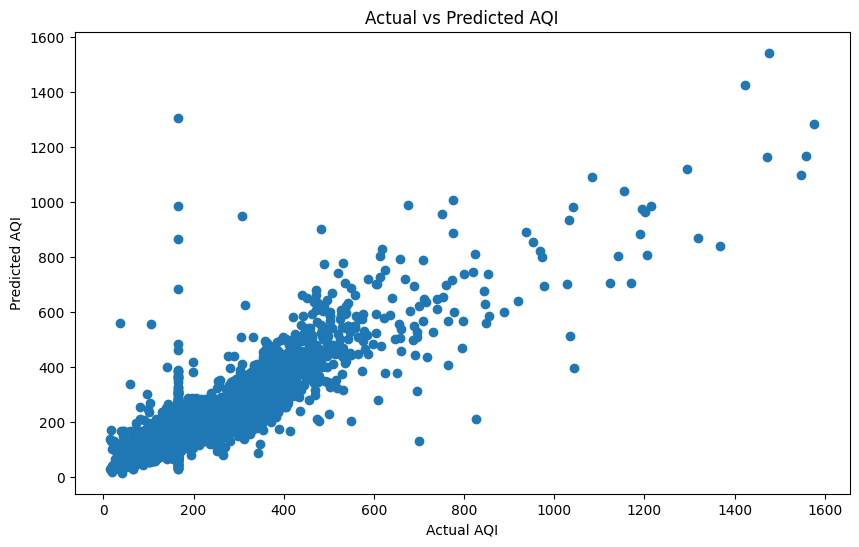

In [29]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Select the features and target variable
features = ['PM2.5', 'PM10', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3', 'Benzene', 'Toluene', 'Xylene']
X = d[features]
y = d['AQI']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

# Plot the actual vs predicted AQI
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred)
plt.xlabel('Actual AQI')
plt.ylabel('Predicted AQI')
plt.title('Actual vs Predicted AQI')
plt.show()


Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


646/646 ━━━━━━━━━━━━━━━━━━━━ 9s 10ms/step - loss: 0.0025 - val_loss: 6.2040e-04
Epoch 2/20
646/646 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step - loss: 0.0016 - val_loss: 5.0538e-04
Epoch 3/20
646/646 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - loss: 0.0013 - val_loss: 5.2980e-04
Epoch 4/20
646/646 ━━━━━━━━━━━━━━━━━━━━ 10s 9ms/step - loss: 0.0012 - val_loss: 5.5315e-04
Epoch 5/20
646/646 ━━━━━━━━━━━━━━━━━━━━ 10s 9ms/step - loss: 0.0012 - val_loss: 8.2961e-04
Epoch 6/20
646/646 ━━━━━━━━━━━━━━━━━━━━ 10s 9ms/step - loss: 0.0012 - val_loss: 4.9491e-04
Epoch 7/20
646/646 ━━━━━━━━━━━━━━━━━━━━ 10s 9ms/step - loss: 0.0012 - val_loss: 6.0178e-04
Epoch 8/20
646/646 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - loss: 0.0011 - val_loss: 5.3072e-04
Epoch 9/20
646/646 ━━━━━━━━━━━━━━━━━━━━ 10s 9ms/step - loss: 0.0010 - val_loss: 5.7109e-04
Epoch 10/20
646/646 ━━━━━━━━━━━━━━━━━━━━ 10s 9ms/step - loss: 9.4113e-04 - val_loss: 7.0728e-04
Epoch 11/20
646/646 ━━━━━━━━━━━━━━━━━━━━ 10s 9ms/step - loss: 9.6832e-04 - val_loss: 5.0527e-04


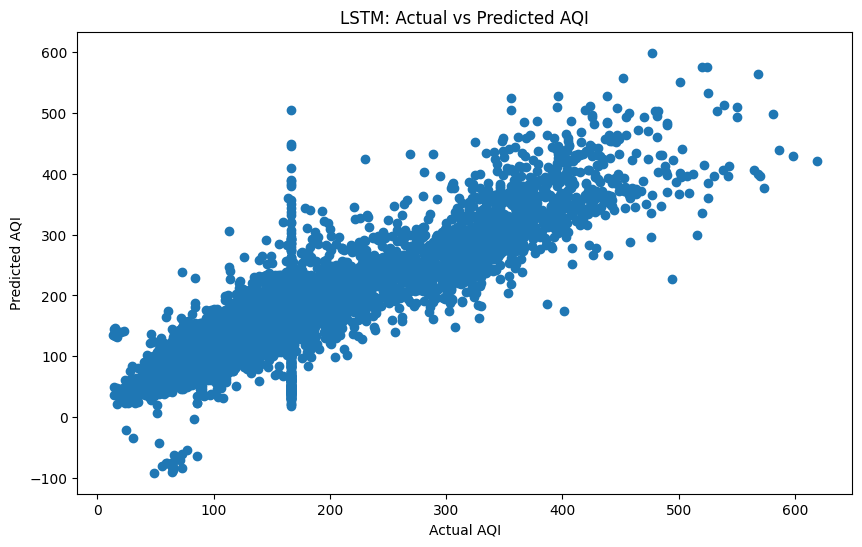

In [31]:
# Scaling only the AQI column, not the entire dataset
aqi_scaler = MinMaxScaler(feature_range=(0, 1))
scaled_aqi = aqi_scaler.fit_transform(d[['AQI']])

# Feature scaling for the rest of the features
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(d[features])

# Creating sequences for LSTM
def create_sequences(data, time_step=5):
    X, y = [], []
    for i in range(len(data) - time_step - 1):
        X.append(data[i:(i + time_step), :])  # Only features
        y.append(scaled_aqi[i + time_step])  # Scaled AQI as target
    return np.array(X), np.array(y)

time_step = 10
X, y = create_sequences(scaled_data, time_step)

# Splitting the data into training and testing sets (70% train, 30% test)
train_size = int(len(X) * 0.7)
X_train, y_train = X[:train_size], y[:train_size]
X_test, y_test = X[train_size:], y[train_size:]

# LSTM model
model_lstm = Sequential()
model_lstm.add(LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model_lstm.add(LSTM(50))
model_lstm.add(Dense(1))

# Compile the model
model_lstm.compile(optimizer='adam', loss='mean_squared_error')

# Train the LSTM model
model_lstm.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))

# Predict using the LSTM model
train_predict = model_lstm.predict(X_train)
test_predict = model_lstm.predict(X_test)

# Inverse transform only the AQI values
train_predict = aqi_scaler.inverse_transform(train_predict)
test_predict = aqi_scaler.inverse_transform(test_predict)

# Evaluate the model
mse_lstm = mean_squared_error(aqi_scaler.inverse_transform(y_test), test_predict)
r2_lstm = r2_score(aqi_scaler.inverse_transform(y_test), test_predict)

print(f'LSTM Model - Mean Squared Error: {mse_lstm}')
print(f'LSTM Model - R-squared: {r2_lstm}')

# Plot actual vs predicted AQI
plt.figure(figsize=(10, 6))
plt.scatter(aqi_scaler.inverse_transform(y_test), test_predict)
plt.xlabel('Actual AQI')
plt.ylabel('Predicted AQI')
plt.title('LSTM: Actual vs Predicted AQI')
plt.show()


In [33]:
pip install hmmlearn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 161.1/161.1 kB 3.3 MB/s eta 0:00:00


HMM Model - Mean Squared Error: 16743.232663345923
HMM Model - R-squared: -0.005174439701243427


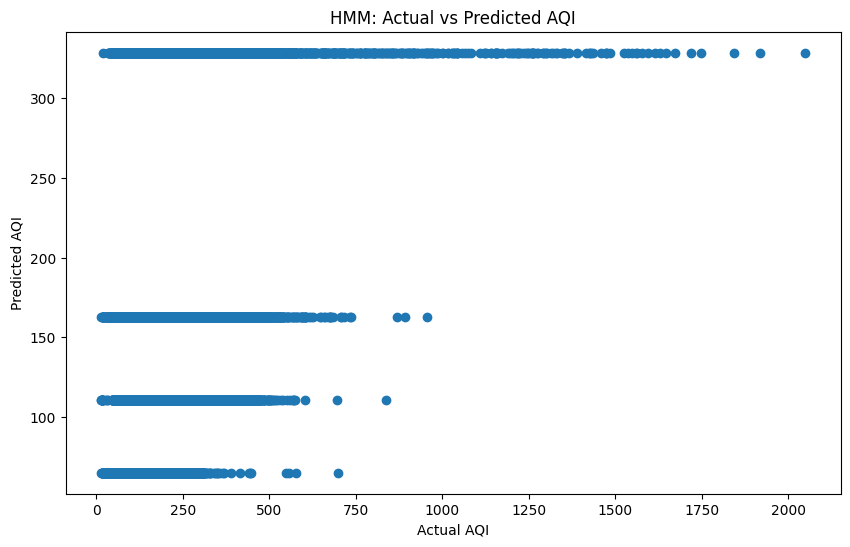

In [34]:
import numpy as np
from hmmlearn import hmm
from sklearn.preprocessing import LabelEncoder

# Discretize AQI into categorical states (using quantiles)
n_states = 4  # Adjust based on needs
aqi_states = pd.qcut(d['AQI'], n_states, labels=False)  # Create AQI states

# Prepare the feature data for HMM
X_hmm = d[features].values  # Use only features
lengths = [len(X_hmm)]  # Full length of the dataset

# Initialize and fit GaussianHMM model
model_hmm = hmm.GaussianHMM(n_components=n_states, covariance_type="diag", n_iter=1000)
model_hmm.fit(X_hmm)

# Predict hidden states
hidden_states = model_hmm.predict(X_hmm)

# Convert hidden states back to AQI values using mean AQI of each state
state_means = d.groupby(aqi_states)['AQI'].mean()
predicted_aqi_values = state_means[hidden_states].values

# Evaluate the HMM model
mse_hmm = mean_squared_error(d['AQI'], predicted_aqi_values)
r2_hmm = r2_score(d['AQI'], predicted_aqi_values)

print(f'HMM Model - Mean Squared Error: {mse_hmm}')
print(f'HMM Model - R-squared: {r2_hmm}')

# Plot Actual vs Predicted AQI (HMM)
plt.figure(figsize=(10, 6))
plt.scatter(d['AQI'], predicted_aqi_values)
plt.xlabel('Actual AQI')
plt.ylabel('Predicted AQI')
plt.title('HMM: Actual vs Predicted AQI')
plt.show()
